# Feature Engineering

## Feature Selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
DIR_PATH = os.path.join('..', 'data', 'raw')

data = pd.read_csv(os.path.join(DIR_PATH, "sample_data.csv"))

In [3]:
data.shape

(104877, 71)

In [4]:
data.head()

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          0.595332      -0.470735          -0.011680               -0.010000   
1          0.387659      -0.470735          -0.011680               -0.010000   
2          0.301562      -0.470734          -0.010421               -0.009054   
3          0.435648      -0.470735          -0.011680               -0.010000   
4          0.389394      -0.470734          -0.010421               -0.009054   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                    -0.057589                    -0.007561   
1                    -0.057589                    -0.007561   
2                    -0.057400                    -0.007559   
3                    -0.057589                    -0.007561   
4                    -0.057400                    -0.007559   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0              -0.302966              -0.282832               -0.314423   
1              -0.302966              -0.282832               -0.314423   
2              -0.302966              -0.282832               -0.314423   
3              -0.302966              -0.282832               -0.314423   
4              -0.302966              -0.282832               -0.314423   

   Fwd Packet Length Std  ...  min_seg_size_forward  Active Mean  Active Std  \
0              -0.260373  ...              0.002701    -0.133328   -0.110847   
1              -0.260373  ...              0.002701    -0.133328   -0.110847   
2              -0.260373  ...              0.002701    -0.133328   -0.110847   
3              -0.260373  ...              0.002701    -0.133328   -0.110847   
4              -0.260373  ...              0.002701    -0.133328   -0.110847   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
0   -0.158407    -0.10708  -0.375644 -0.116044 -0.381002 -0.361637   
1   -0.158407    -0.10708  -0.375644 -0.116044 -0.381002 -0.361637   
2   -0.158407    -0.10708  -0.375644 -0.116044 -0.381002 -0.361637   
3   -0.158407    -0.10708  -0.375644 -0.116044 -0.381002 -0.361637   
4   -0.158407    -0.10708  -0.375644 -0.116044 -0.381002 -0.361637   

   Attack Number  
0              6  
1              6  
2              0  
3              6  
4              0  

[5 rows x 71 columns]

In [5]:
X = data.drop(['Attack Number'],axis=1).values
y = data.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0,stratify = y)

### Feature selection by information gain

In [7]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [8]:
# calculate the sum of importance scores
features = data.dtypes[data.dtypes != 'object'].index
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [9]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break

In [10]:
X_fs = data[fs].values
X_fs.shape

(104877, 48)

In [11]:
X_fs[:5]

array([[-0.6001455 , -0.58816576, -0.31419095, -0.49594724, -0.24985677,
        -0.00756107, -0.00756101,  0.5953324 , -0.5287803 , -0.5287803 ,
        -0.05766553, -0.05758861, -0.47518995, -0.49834946, -0.3935072 ,
        -0.30296633, -0.427549  ,  0.00130953,  0.00130953, -0.40084043,
        -0.46196735, -0.29134986, -0.47073466,  0.42529428, -0.3144227 ,
         0.00167291, -0.00892528, -0.04623099, -0.3144227 , -0.09371792,
        -0.30867958, -0.387499  , -0.361598  , -0.42722344, -0.01000002,
        -0.01000002, -0.26037332, -0.29051718, -0.0116804 , -0.0116804 ,
        -0.36740384, -0.21579824, -0.12531745, -0.12342195, -0.5239813 ,
        -0.25159153, -0.1333278 , -0.10708033],
       [-0.6001455 , -0.58816576, -0.31419095, -0.49594724, -0.24985677,
        -0.00756107, -0.00756101,  0.38765898, -0.5287803 , -0.5287803 ,
        -0.05766553, -0.05758861, -0.47518995, -0.49834946, -0.3935072 ,
        -0.30296633, -0.427549  ,  0.00130953,  0.00130953, -0.40084106,
   

In [12]:
def correlationSelection(X, y, featureList, LabelColumnName, dataset, featureNumber):
    # Compute the correlation matrix
    corrmat = dataset.corr()
    
    # Dynamically calculate the index for the target column in the correlation matrix
    target_index = corrmat.columns.get_loc(LabelColumnName)
    
    # Correlation of features with the target column
    corr_ = corrmat.iloc[target_index, :]
    corr_scores = corr_.tolist()
    
    # Combine features and their correlation scores
    unsorted_scores = list(zip(featureList, corr_scores))
    featureScoreDataFrame = pd.DataFrame(unsorted_scores, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
    
    # Select top features
    featureNumber = featureNumber + 1  # Including the label
    selectedFeature = featureScoreDataFrame.head(featureNumber).sort_values(by='score')['Feature'].tolist()
    seriesFeature = pd.Series(featureScoreDataFrame['score'].values, featureScoreDataFrame['Feature'].values)
    
    # Plot the top features by correlation
    plt.figure(figsize=(16, 16))
    seriesFeature.nlargest(77).plot(kind='barh')
    plt.show()
    
    # Return the selected features
    featureDataFrame = dataset.loc[:, selectedFeature]
    return featureDataFrame


In [13]:
def univariateSelection(X,y,featureList,LabelColumnName,dataset,featureNumber):#this method selects the feature with Anova-F
    model=SelectKBest(k = 'all')
    model.fit(X,y)
    unsorted_scores = list(zip(featureList[1:], model.scores_))
    featureScoreDataFrame=pd.DataFrame(unsorted_scores, columns = ['Feature', 'score']).sort_values(by = 'score', ascending = False)
    selectedFeature=featureScoreDataFrame.head(featureNumber)['Feature'].tolist() + [LabelColumnName]
    featureDataFrame=dataset.loc[:,selectedFeature]
    seriesFeature=pd.Series(featureScoreDataFrame['score'].values, featureScoreDataFrame['Feature'].values)
    plt.figure(figsize=(16,16))
    seriesFeature.nlargest(77).plot(kind='barh')
    plt.show()
    return featureScoreDataFrame,featureDataFrame

In [14]:
def randomForestSelection(X,y,featureList,LabelColumnName,dataset, featureNumber):#this method selects the feature with random forest
    model=RandomForestClassifier(n_estimators=20)
    model.fit(X,y)
    importances = list(model.feature_importances_)
    featureImportances = [(feature, round(importance, 4)) for feature, importance in zip(featureList, importances)]
    featureImportances= sorted(featureImportances, key = lambda x: x[1], reverse = True)
    unsorted_scores = list(zip(featureList, model.feature_importances_))
    featureScoreDataFrame=pd.DataFrame(unsorted_scores, columns = ['Feature', 'score']).sort_values(by = 'score', ascending = False)
    selectedFeature=featureScoreDataFrame.head(featureNumber)['Feature'].tolist() + [LabelColumnName]
    featureDataFrame=dataset.loc[:,selectedFeature]
    seriesFeature=pd.Series(model.feature_importances_, index=dataset.drop([LabelColumnName],axis=1).columns)
    plt.figure(figsize=(16,16))
    seriesFeature.nlargest(77).plot(kind='barh')
    plt.show()
    return featureScoreDataFrame,featureDataFrame

In [15]:
def extraTreesSelection(X,y,featureList,LabelColumnName,dataset,featureNumber): #this method selects the feature with Extra Trees
    model=ExtraTreesClassifier(n_estimators=250,random_state=0)
    model.fit(X,y)
    seriesFeature=pd.Series(model.feature_importances_, index=featureList)
    plt.figure(figsize=(16,16))
    seriesFeature.nlargest(77).plot(kind='barh')
    plt.show()
    unsorted_scores = list(zip(featureList, model.feature_importances_))
    featureScoreDataFrame=pd.DataFrame(unsorted_scores, columns = ['Feature', 'score']).sort_values(by = 'score', ascending = False)
    selectedFeature=featureScoreDataFrame.head(featureNumber)['Feature'].tolist() + [LabelColumnName]
    featureDataFrame=dataset.loc[:,selectedFeature]
    return featureScoreDataFrame,featureDataFrame

In [16]:
def lassoSelection(X, y, featureList, LabelColumnName, dataset, featureNumber, alpha=0.01):
    # Fit Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    
    # Get feature importances (coefficients)
    model = SelectFromModel(lasso, prefit=True, max_features=featureNumber)
    selected_features = model.get_support(indices=True)
    
    # Create DataFrame for feature scores
    feature_scores = abs(lasso.coef_)
    unsorted_scores = list(zip(featureList, feature_scores))
    featureScoreDataFrame = pd.DataFrame(unsorted_scores, columns=['Feature', 'score']).sort_values(by='score', ascending=False)
    
    selectedFeature = featureScoreDataFrame.head(featureNumber)['Feature'].tolist() + [LabelColumnName]
    featureDataFrame = dataset.loc[:, selectedFeature]
    
    # Plot feature importances
    seriesFeature = pd.Series(feature_scores, index=featureList)
    plt.figure(figsize=(16, 16))
    seriesFeature.nlargest(featureNumber).plot(kind='barh')
    plt.title('Feature Importance using Lasso')
    plt.show()
    
    return featureScoreDataFrame, featureDataFrame

In [17]:
def votingSystem(correlation_df, univariate_df, random_forest_df, extra_trees_df, lasso_df):
    # Initialize a DataFrame to track votes
    all_features = list(set(correlation_df['Feature']).union(univariate_df['Feature'], 
                                                             random_forest_df['Feature'], 
                                                             extra_trees_df['Feature'],
                                                             lasso_df['Feature']))
    
    votes_df = pd.DataFrame(0, index=all_features, columns=['Correlation', 'Univariate', 'RandomForest', 'ExtraTrees', 'Lasso'])
    
    # Add votes
    for feature in correlation_df['Feature']:
        votes_df.loc[feature, 'Correlation'] += 1
    for feature in univariate_df['Feature']:
        votes_df.loc[feature, 'Univariate'] += 1
    for feature in random_forest_df['Feature']:
        votes_df.loc[feature, 'RandomForest'] += 1
    for feature in extra_trees_df['Feature']:
        votes_df.loc[feature, 'ExtraTrees'] += 1
    for feature in lasso_df['Feature']:
        votes_df.loc[feature, 'Lasso'] += 1
    
    # Sum total votes
    votes_df['Total Votes'] = votes_df.sum(axis=1)
    votes_df = votes_df.sort_values('Total Votes', ascending=False)
    
    return votes_df


In [18]:
data["Attack Number"].value_counts()

Attack Number
0    83808
3    12897
6     3666
7     2143
1     1953
2      363
5       36
4       11
Name: count, dtype: int64

In [19]:
# Example data
LabelColumnName = "Attack Number"
X = data.drop(columns=[LabelColumnName])
y = data[LabelColumnName]
featureNumber = 7

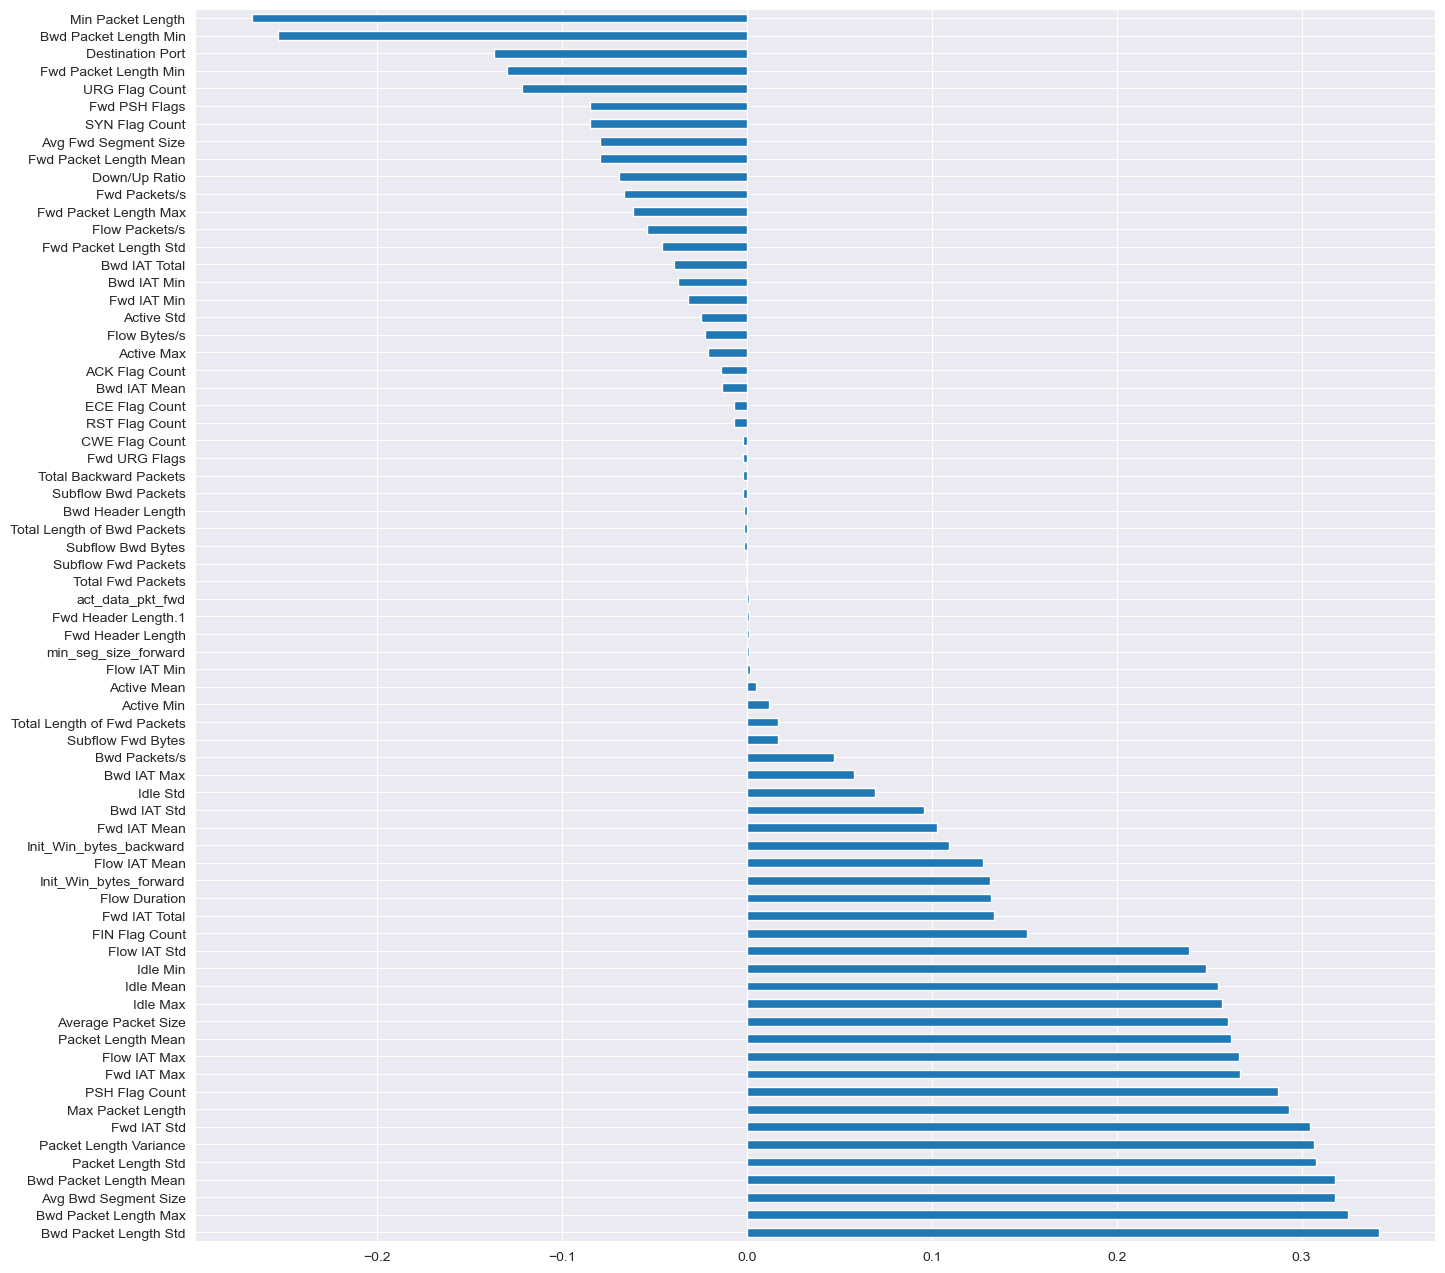

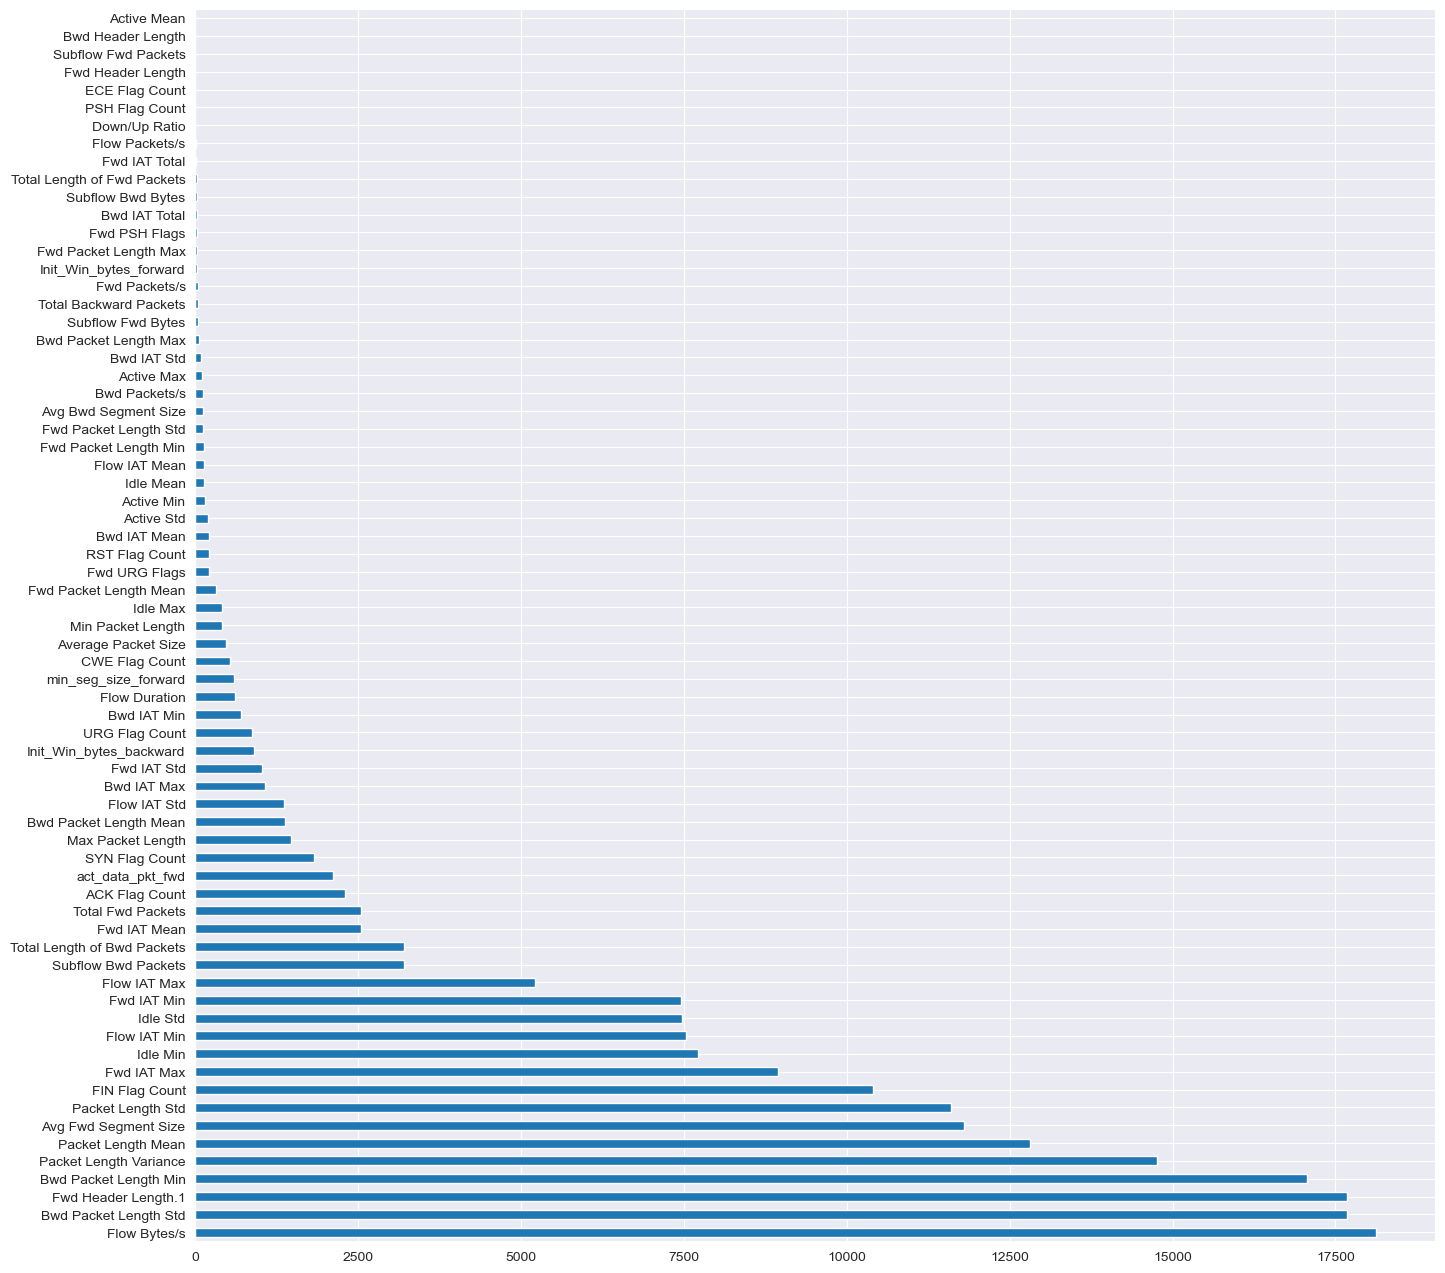

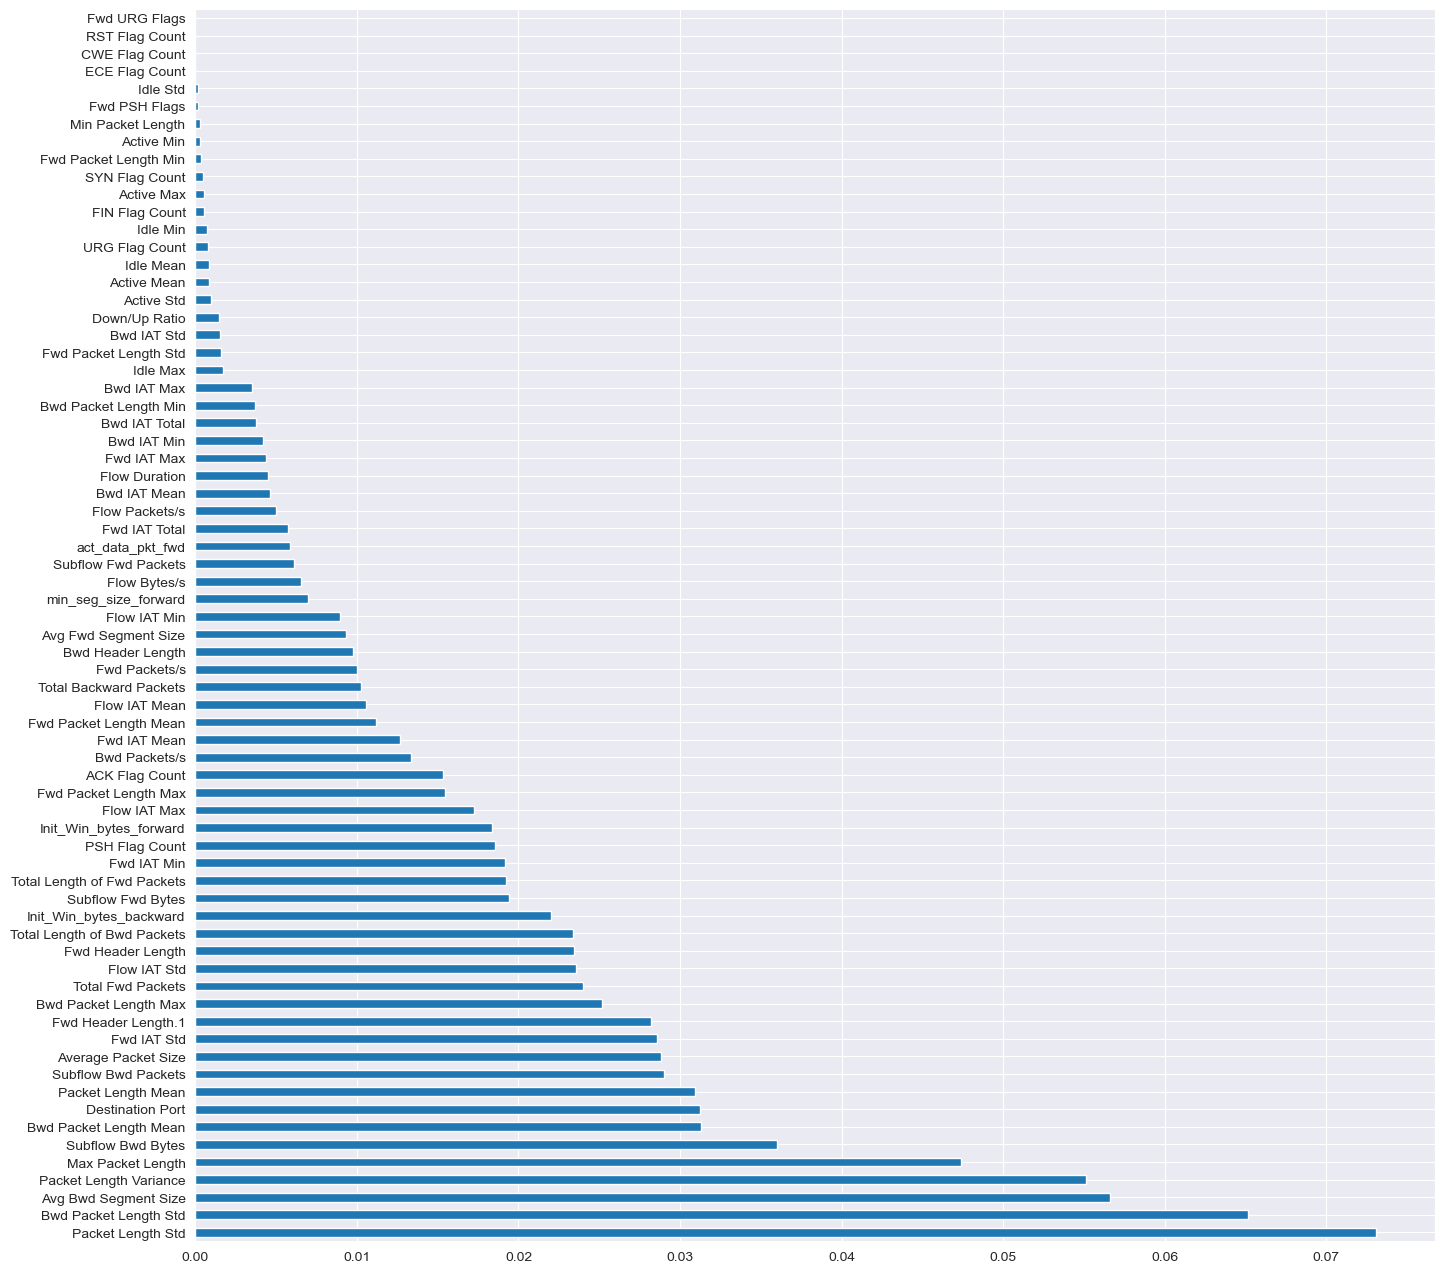

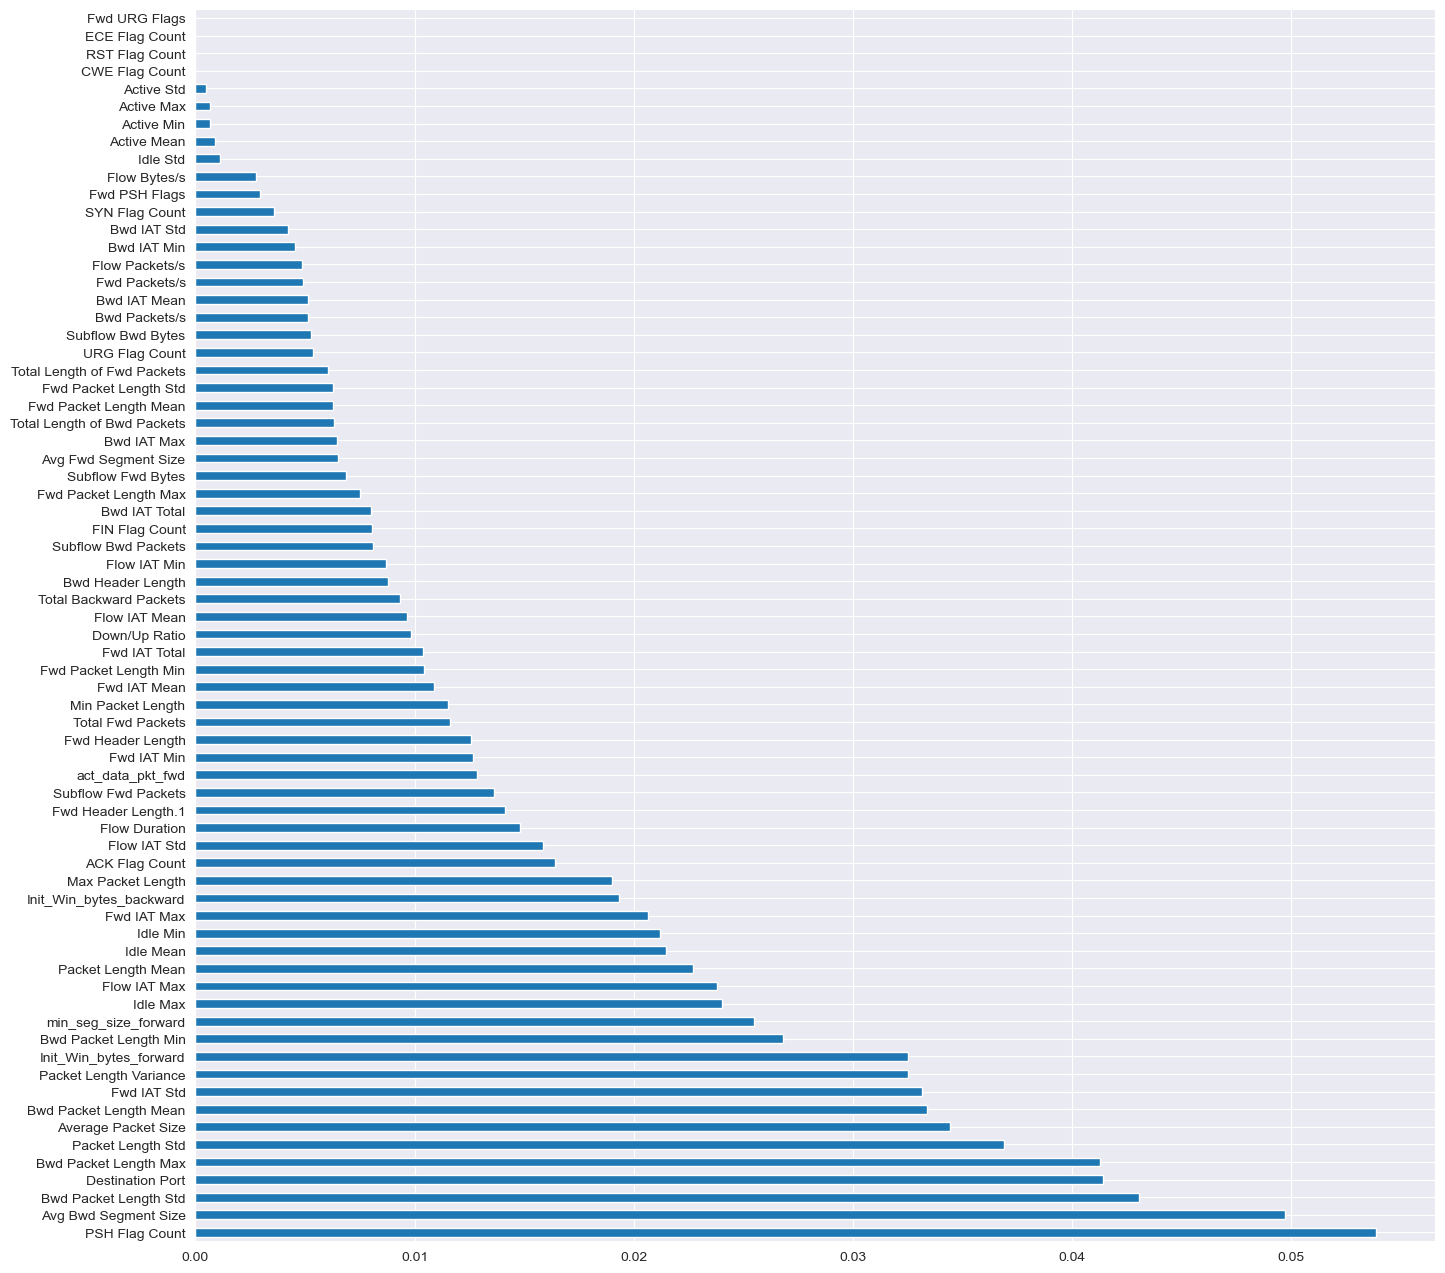

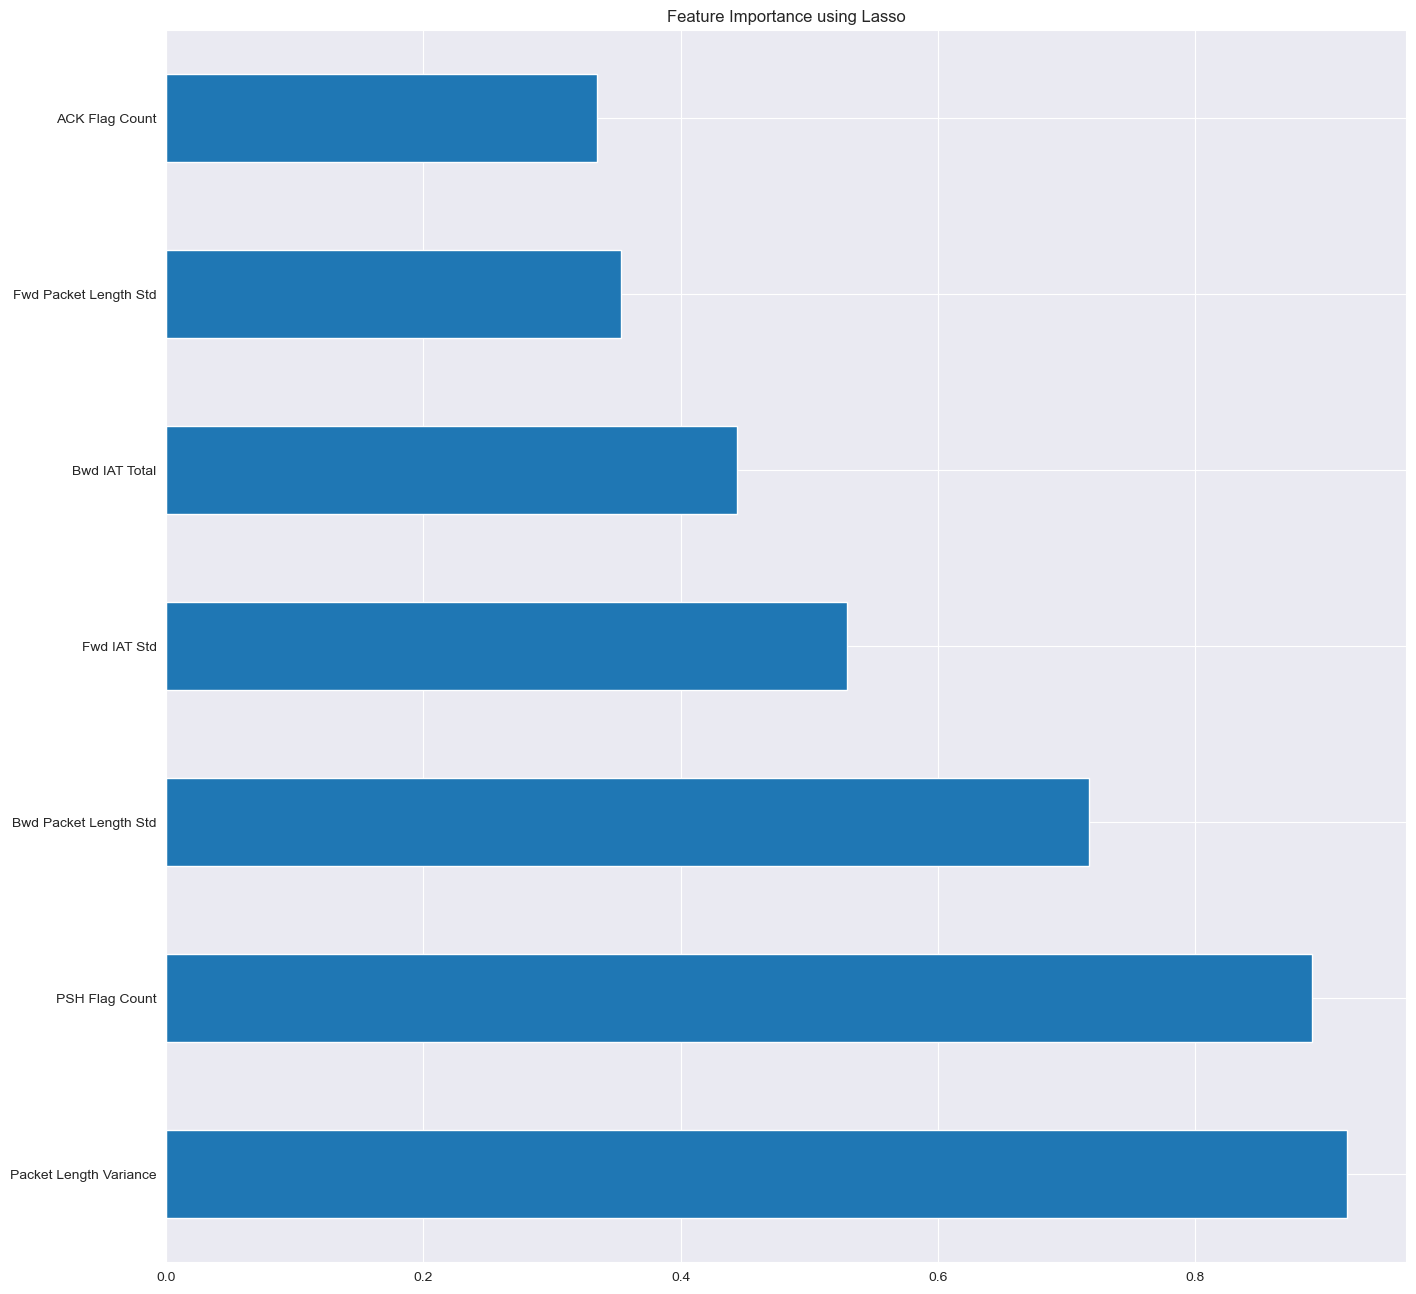

In [20]:

# Run each feature selection method
correlation_df = correlationSelection(X, y, X.columns, LabelColumnName, data, featureNumber)
univariate_df, _ = univariateSelection(X, y, X.columns, LabelColumnName, data, featureNumber)
random_forest_df, _ = randomForestSelection(X, y, X.columns, LabelColumnName, data, featureNumber)
extra_trees_df, _ = extraTreesSelection(X, y, X.columns, LabelColumnName, data, featureNumber)
lasso_df, _ = lassoSelection(X, y, X.columns, LabelColumnName, data, featureNumber)
# Reshape correlation_df into the required format
correlation_df = pd.DataFrame({
    'Feature': correlation_df.columns,  # Features as rows
    'score': correlation_df.iloc[0]     # Use corresponding scores if available
})
# Apply voting system
votes_df = votingSystem(correlation_df, univariate_df, random_forest_df, extra_trees_df, lasso_df)

# Plot results
import plotly.graph_objects as go

votes_df_plot = votes_df.sort_values('Total Votes').drop(columns=['Total Votes']).T

fig = go.Figure()
for model in votes_df_plot.index:
    fig.add_trace(go.Bar(y=votes_df_plot.columns, x=votes_df_plot.loc[model], name=model, orientation='h'))
    
fig.update_layout(
    title="Voting Results for Feature Selection by Model",
    xaxis_title="Vote Count (Stacked by Model)",
    yaxis_title="Feature",
    barmode='stack',
    height=20 * len(votes_df_plot.columns),
    legend_title="Model"
)

fig.show()


In [21]:
print("Correlation DF Columns:", correlation_df.columns)
print("Univariate DF Columns:", univariate_df.columns)
print("Random Forest DF Columns:", random_forest_df.columns)
print("Extra Trees DF Columns:", extra_trees_df.columns)
print("Lasso DF Columns:", lasso_df.columns)


Correlation DF Columns: Index(['Feature', 'score'], dtype='object')
Univariate DF Columns: Index(['Feature', 'score'], dtype='object')
Random Forest DF Columns: Index(['Feature', 'score'], dtype='object')
Extra Trees DF Columns: Index(['Feature', 'score'], dtype='object')
Lasso DF Columns: Index(['Feature', 'score'], dtype='object')


## Feature extraction



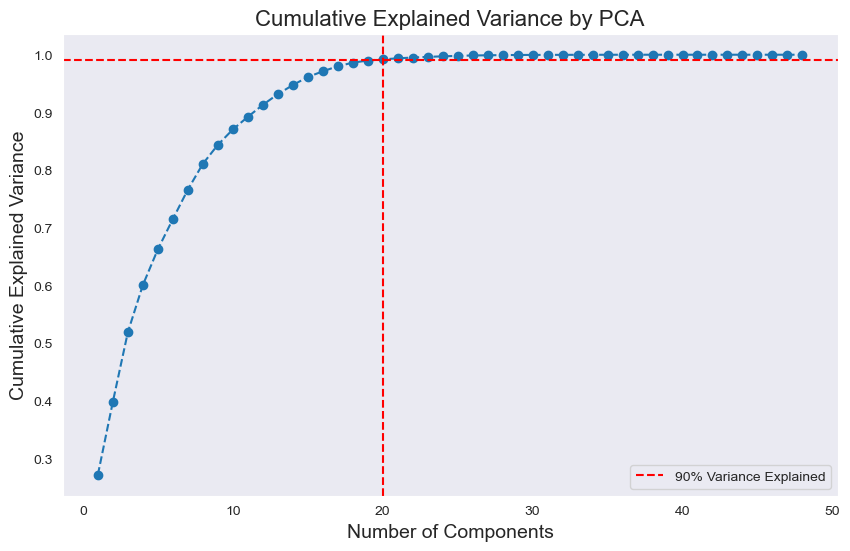

Number of components to explain 99% variance: 20


In [22]:
#
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA()
for batch in np.array_split(X_fs, len(X_fs) // 500):
    ipca.partial_fit(batch)


# Explained variance ratio
explained_variance_ratio = ipca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance by PCA', fontsize=16)
plt.axhline(y=0.99, color='r', linestyle='--', label='90% Variance Explained')  # Add target line
plt.axvline(x=np.argmax(cumulative_variance >= 0.99) + 1, color='r', linestyle='--')  # Add vertical line for 90%
plt.legend()
plt.grid()
plt.show()

# Number of components to explain 90% variance
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
print(f"Number of components to explain 99% variance: {n_components_99}")


In [23]:
y.shape, X_fs.shape

((104877,), (104877, 48))

In [24]:
from sklearn.decomposition import IncrementalPCA

size = np.argmax(cumulative_variance >= 0.99) + 1
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_fs, len(X_fs) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

transformed_features = ipca.transform(X_fs)


information retained: 99.08%


In [25]:
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Target'] = y.values
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.967311 -0.121152  0.024686 -0.106439 -0.011335  0.282595  0.083060   
1      -1.975268 -0.128168  0.018084 -0.123356 -0.012126  0.414638  0.103759   
2      -1.964094 -0.131195  0.014242 -0.136421 -0.012082  0.315862  0.089296   
3      -1.959400 -0.126809  0.018230 -0.124885 -0.013280  0.236694  0.076846   
4      -1.962077 -0.128205  0.017169 -0.128743 -0.011618  0.274191  0.082668   
...          ...       ...       ...       ...       ...       ...       ...   
104872 -1.824489 -0.212654  0.060982 -0.198707 -0.013714 -0.315271  0.012389   
104873 -1.825567 -0.210822  0.059330 -0.198390 -0.013702 -0.315356  0.013554   
104874 -1.824182 -0.212797  0.061104 -0.198658 -0.013707 -0.315242  0.012614   
104875 -1.823050 -0.213765  0.061955 -0.198646 -0.013696 -0.315138  0.012782   
104876 -1.826670 -0.209922  0.058538 -0.198423 -0.013715 -0.315456  0.013318   

             PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0      -0.118956 -0.042261  0.402554  ...  0.096900 -0.752433  0.014226   
1      -0.099888 -0.072380  0.331981  ...  0.372954 -0.588795  0.048840   
2      -0.108655 -0.081322  0.301555  ...  0.323593 -0.579155  0.060903   
3      -0.120205 -0.062015  0.347074  ...  0.151804 -0.682442  0.038606   
4      -0.115188 -0.068910  0.331517  ...  0.221968 -0.642994  0.046478   
...          ...       ...       ...  ...       ...       ...       ...   
104872 -0.134216  0.179611 -0.028340  ...  0.010101 -0.598897  0.295827   
104873 -0.135492  0.179010 -0.027872  ...  0.009897 -0.598738  0.296880   
104874 -0.134523  0.179498 -0.028285  ...  0.009994 -0.598850  0.296094   
104875 -0.134860  0.179411 -0.028286  ...  0.009809 -0.598786  0.296405   
104876 -0.135077  0.179129 -0.027880  ...  0.010113 -0.598811  0.296502   

            PC15      PC16      PC17      PC18      PC19      PC20  Target  
0       0.461057 -0.174840 -0.012129  0.027832  0.058241 -0.001201       6  
1       0.457799 -0.313943 -0.009371  0.008182  0.051380 -0.000435       6  
2       0.439517 -0.366742 -0.009419  0.004122  0.049703 -0.000128       0  
3       0.442336 -0.277050 -0.011147  0.016450  0.054076 -0.000633       6  
4       0.442454 -0.308369 -0.010479  0.012074  0.052497 -0.000450       0  
...          ...       ...       ...       ...       ...       ...     ...  
104872  0.280001 -0.354670 -0.046909  0.090294  0.004973  0.001518       1  
104873  0.279968 -0.354726 -0.046636  0.090291  0.005025  0.001435       1  
104874  0.279992 -0.354659 -0.046779  0.090295  0.004975  0.001496       1  
104875  0.279982 -0.354615 -0.046604  0.090314  0.004957  0.001472       1  
104876  0.279980 -0.354768 -0.046855  0.090279  0.005038  0.001466       1  

[104877 rows x 21 columns]

In [26]:
DIR_PATH = os.path.join('..', 'data', 'processed')

new_data.to_csv(os.path.join(DIR_PATH, "pca_data.csv"), index=False)

In [27]:
procesed_data = pd.read_csv(os.path.join(DIR_PATH, "pca_data.csv"))
procesed_data['Target'].value_counts()

Target
0    83808
3    12897
6     3666
7     2143
1     1953
2      363
5       36
4       11
Name: count, dtype: int64

In [28]:
procesed_data.shape

(104877, 21)

## splitting train and test sets


In [29]:
X = procesed_data.drop(['Target'],axis=1).values
y = procesed_data.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)

In [30]:
print(f"X_train shape = {X_train.shape}\ny_train shape = {y_train.shape}\nX_test shape = {X_test.shape}\ny_test shape = {y_test.shape}")

X_train shape = (83901, 20)
y_train shape = (83901,)
X_test shape = (20976, 20)
y_test shape = (20976,)


In [31]:
pd.Series(y_train).value_counts()

0    67046
3    10318
6     2933
7     1714
1     1562
2      290
5       29
4        9
Name: count, dtype: int64

### SMOTE for feature imbalace

In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000, 4:1000, 5:1000})

In [33]:
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [34]:
pd.Series(y_train_SMOTE).value_counts()

0    67046
3    10318
6     2933
7     1714
1     1562
2     1000
5     1000
4     1000
Name: count, dtype: int64

## Model Selection

### Decision Tree

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)

##### Data without SMOTE

In [35]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split": int(params['min_samples_split']),
        "min_samples_leaf": int(params['min_samples_leaf']),
        "criterion": str(params['criterion'])
    }
    clf = DecisionTreeClassifier(**params)

    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train, y_train,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features": hp.quniform('max_features', 1, X_train.shape[1], 1),
    "min_samples_split": hp.quniform('min_samples_split', 2, 11, 1),
    "min_samples_leaf": hp.quniform('min_samples_leaf', 1, 11, 1),
    "criterion": hp.choice('criterion', ['gini', 'entropy'])
}

# Perform the optimization
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50
)

print("Decision tree: Hyperopt estimated optimum {}".format(best))


100%|██████████| 50/50 [08:30<00:00, 10.20s/trial, best loss: -0.9884193230245699]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 36.0, 'max_features': 18.0, 'min_samples_leaf': 1.0, 'min_samples_split': 3.0}


Accuracy of DT: 0.989607170099161
Precision of DT: 0.9896345521573688
Recall of DT: 0.989607170099161
F1-score of DT: 0.9896098882357631
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16762
           1       0.89      0.93      0.91       391
           2       0.97      0.95      0.96        73
           3       0.99      0.99      0.99      2579
           4       1.00      1.00      1.00         2
           5       0.60      0.43      0.50         7
           6       0.95      0.95      0.95       733
           7       0.98      0.98      0.98       429

    accuracy                           0.99     20976
   macro avg       0.92      0.90      0.91     20976
weighted avg       0.99      0.99      0.99     20976



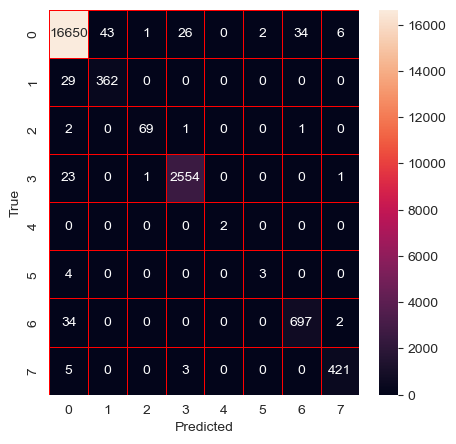

In [39]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_DT = {
    'min_samples_leaf': int(best['min_samples_leaf']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
dt_hpo = DecisionTreeClassifier(**best_DT)
dt_hpo.fit(X_train, y_train)

# Evaluate the model
dt_score = dt_hpo.score(X_test, y_test)
y_predict = dt_hpo.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of DT: ' + str(dt_score))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


##### Data with SMOTE

In [58]:
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split": int(params['min_samples_split']),
        "min_samples_leaf": int(params['min_samples_leaf']),
        "criterion": str(params['criterion'])
    }
    clf = DecisionTreeClassifier(**params)

    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train_SMOTE, y_train_SMOTE,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features": hp.quniform('max_features', 1, X_train.shape[1], 1),
    "min_samples_split": hp.quniform('min_samples_split', 2, 11, 1),
    "min_samples_leaf": hp.quniform('min_samples_leaf', 1, 11, 1),
    "criterion": hp.choice('criterion', ['gini', 'entropy'])
}

# Perform the optimization
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50
)

print("Decision tree: Hyperopt estimated optimum {}".format(best))


100%|██████████| 50/50 [06:23<00:00,  7.67s/trial, best loss: -0.9885508633246539]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 26.0, 'max_features': 18.0, 'min_samples_leaf': 1.0, 'min_samples_split': 8.0}


Accuracy of DT: 0.988558352402746
Precision of DT: 0.9890663209532029
Recall of DT: 0.988558352402746
F1-score of DT: 0.9887752548204216
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16762
           1       0.91      0.92      0.91       391
           2       0.96      0.95      0.95        73
           3       0.98      0.99      0.99      2579
           4       0.67      1.00      0.80         2
           5       0.21      0.57      0.31         7
           6       0.94      0.96      0.95       733
           7       0.98      0.97      0.98       429

    accuracy                           0.99     20976
   macro avg       0.83      0.92      0.86     20976
weighted avg       0.99      0.99      0.99     20976



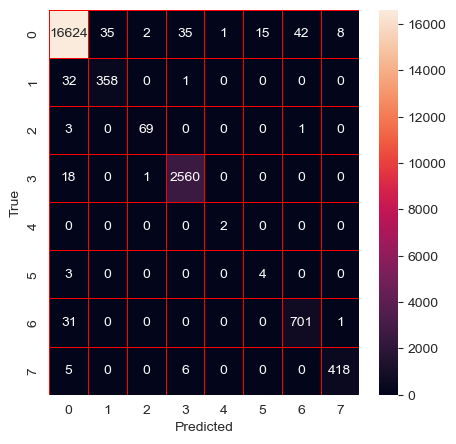

In [59]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_DT_SMOTE = {
    'min_samples_leaf': int(best['min_samples_leaf']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
dt_hpo_SMOTE = DecisionTreeClassifier(**best_DT_SMOTE)
dt_hpo_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Evaluate the model
dt_score_SMOTE = dt_hpo_SMOTE.score(X_test, y_test)
y_predict = dt_hpo_SMOTE.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of DT: ' + str(dt_score_SMOTE))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Extra Tree

#### Hyperparameter optimization (HPO) of Extra tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)




##### without SMOTE

In [42]:
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train, y_train,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [07:14<00:00, 21.71s/trial, best loss: -0.9925661232379612]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 37.0, 'max_features': 20.0, 'min_samples_leaf': 3.0, 'min_samples_split': 7.0, 'n_estimators': 174.0}


Accuracy of DT: 0.9937547673531655
Precision of DT: 0.9937719563771623
Recall of DT: 0.9937547673531655
F1-score of DT: 0.9936914236029282
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.94      0.95      0.95       391
           2       1.00      0.95      0.97        73
           3       0.99      0.99      0.99      2579
           4       1.00      1.00      1.00         2
           5       1.00      0.29      0.44         7
           6       0.98      0.97      0.97       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.99      0.89      0.91     20976
weighted avg       0.99      0.99      0.99     20976



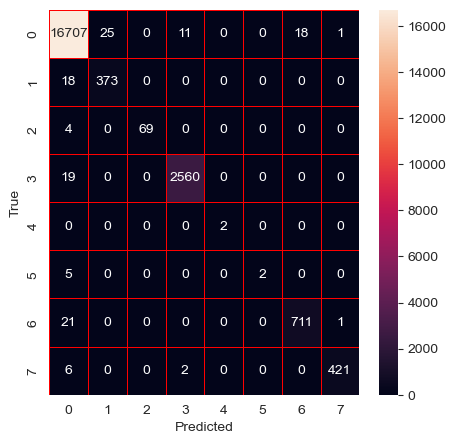

In [46]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_ET = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
et_hpo = ExtraTreesClassifier(**best_ET)
et_hpo.fit(X_train, y_train)

# Evaluate the model
et_score = et_hpo.score(X_test, y_test)
y_predict = et_hpo.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of ET: ' + str(et_score))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


##### with SMOTE

In [62]:
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train_SMOTE, y_train_SMOTE,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [09:47<00:00, 29.38s/trial, best loss: -0.99279873279446] 
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 48.0, 'max_features': 13.0, 'min_samples_leaf': 2.0, 'min_samples_split': 3.0, 'n_estimators': 177.0}


Accuracy of ET: 0.9939454614797865
Precision of ET: 0.9939482314442343
Recall of ET: 0.9939454614797865
F1-score of ET: 0.9939352181406742
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.93      0.95      0.94       391
           2       1.00      0.96      0.98        73
           3       1.00      0.99      0.99      2579
           4       1.00      1.00      1.00         2
           5       0.80      0.57      0.67         7
           6       0.97      0.97      0.97       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.96      0.93      0.94     20976
weighted avg       0.99      0.99      0.99     20976



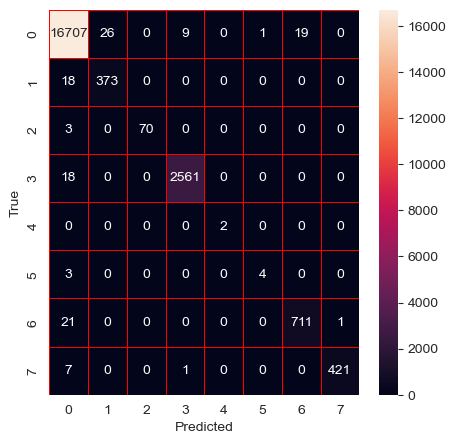

In [65]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_ET_SMOTE = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
et_hpo_SMOTE = ExtraTreesClassifier(**best_ET_SMOTE)
et_hpo_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Evaluate the model
et_score_SMOTE = et_hpo_SMOTE.score(X_test, y_test)
y_predict = et_hpo_SMOTE.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of ET: ' + str(et_score_SMOTE))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Random Forest

#### Hyperparameter optimization (HPO) of Extra tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)

##### without SMOTE

In [49]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train, y_train,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [2:36:49<00:00, 470.47s/trial, best loss: -0.992356374808628]  
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 49.0, 'max_features': 15.0, 'min_samples_leaf': 2.0, 'min_samples_split': 4.0, 'n_estimators': 178.0}


Accuracy of RF: 0.9940408085430968
Precision of RF: 0.994069522769697
Recall of RF: 0.9940408085430968
F1-score of RF: 0.9939818313164469
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.94      0.96      0.95       391
           2       1.00      0.95      0.97        73
           3       1.00      0.99      0.99      2579
           4       1.00      1.00      1.00         2
           5       1.00      0.29      0.44         7
           6       0.97      0.97      0.97       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.99      0.89      0.91     20976
weighted avg       0.99      0.99      0.99     20976



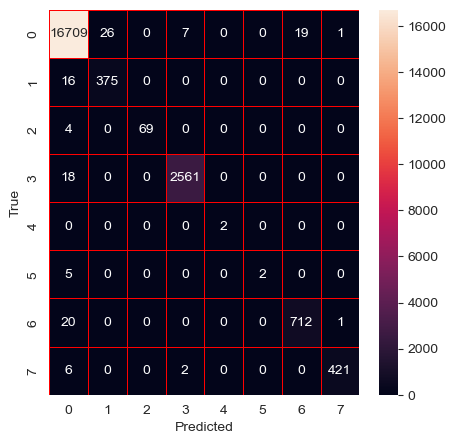

In [50]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_RF = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
rf_hpo = ExtraTreesClassifier(**best_ET)
rf_hpo.fit(X_train, y_train)

# Evaluate the model
rf_score = rf_hpo.score(X_test, y_test)
y_predict = rf_hpo.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of RF: ' + str(rf_score))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


##### with SMOTE

In [51]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train_SMOTE, y_train_SMOTE,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/5 [06:40<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_RF = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'max_features': int(best['max_features']),
    'min_samples_leaf': int(best['min_samples_leaf']),
    'criterion': ['gini', 'entropy'][best['criterion']]  # Map choice index to actual value
}

# Use the best hyperparameters to train the model
rf_hpo = ExtraTreesClassifier(**best_ET)
rf_hpo.fit(X_train_SMOTE, y_train_SMOTE)

# Evaluate the model
rf_score = rf_hpo.score(X_test, y_test)
y_predict = rf_hpo.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of RF: ' + str(rf_score))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### XGBoost

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)

##### without SMOTE

In [52]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train, y_train,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [04:17<00:00, 12.86s/trial, best loss: -0.9930474740677042]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.833499778120445, 'max_depth': 64.0, 'n_estimators': 85.0}


Accuracy of XGBoost: 0.9937547673531655
Precision of XGBoost: 0.9937395675540014
Recall of XGBoost: 0.9937547673531655
F1-score of XGBoost: 0.9937147344472471
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.93      0.96      0.94       391
           2       0.99      0.96      0.97        73
           3       0.99      0.99      0.99      2579
           4       1.00      1.00      1.00         2
           5       0.67      0.29      0.40         7
           6       0.97      0.98      0.97       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.94      0.89      0.91     20976
weighted avg       0.99      0.99      0.99     20976



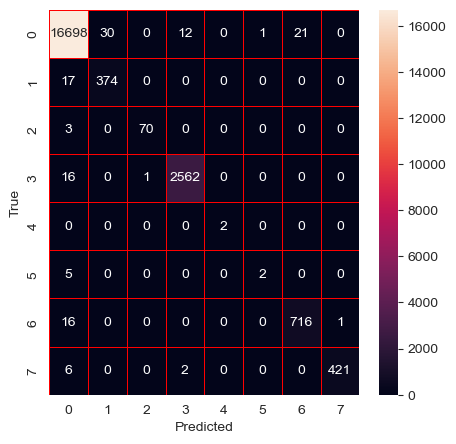

In [53]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_XG = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': int(best['learning_rate'])
}

# Use the best hyperparameters to train the model
xg_hpo = xgb.XGBClassifier(**best_ET)
xg_hpo.fit(X_train, y_train)

# Evaluate the model
xg_score = xg_hpo.score(X_test, y_test)
y_predict = xg_hpo.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of XGBoost: ' + str(xg_score))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


##### with SMOTE


In [54]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    # Use stratified k-fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(
        clf, X_train_SMOTE, y_train_SMOTE,
        cv=skf,
        scoring=make_scorer(f1_score, average='weighted')
    ).mean()

    # Return the negative F1 score because Hyperopt minimizes the loss
    return {'loss': -f1, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [03:16<00:00,  9.84s/trial, best loss: -0.9932884543986296]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.49281660361113466, 'max_depth': 43.0, 'n_estimators': 85.0}


Accuracy of XGBoost: 0.9943745232646835
Precision of XGBoost: 0.99440429093601
Recall of XGBoost: 0.9943745232646835
F1-score of XGBoost: 0.9943754572498971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.94      0.95      0.94       391
           2       0.99      0.96      0.97        73
           3       1.00      0.99      1.00      2579
           4       0.67      1.00      0.80         2
           5       1.00      0.71      0.83         7
           6       0.98      0.97      0.98       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.94      0.95      0.94     20976
weighted avg       0.99      0.99      0.99     20976



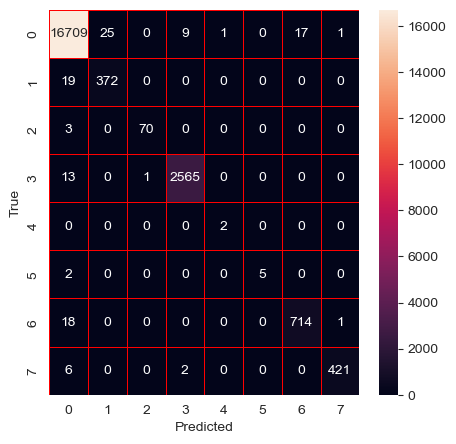

In [55]:
# Convert Hyperopt results to appropriate data types for DecisionTreeClassifier
best_XG_SMOTE = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': int(best['learning_rate'])
}

# Use the best hyperparameters to train the model
xg_hpo_SMOTE = xgb.XGBClassifier(**best_ET)
xg_hpo_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Evaluate the model
xg_score_SMOTE = xg_hpo_SMOTE.score(X_test, y_test)
y_predict = xg_hpo_SMOTE.predict(X_test)
y_true = y_test

# Print metrics
print('Accuracy of XGBoost: ' + str(xg_score_SMOTE))
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_true, y_predict, average='weighted'
)
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Model Evaluation

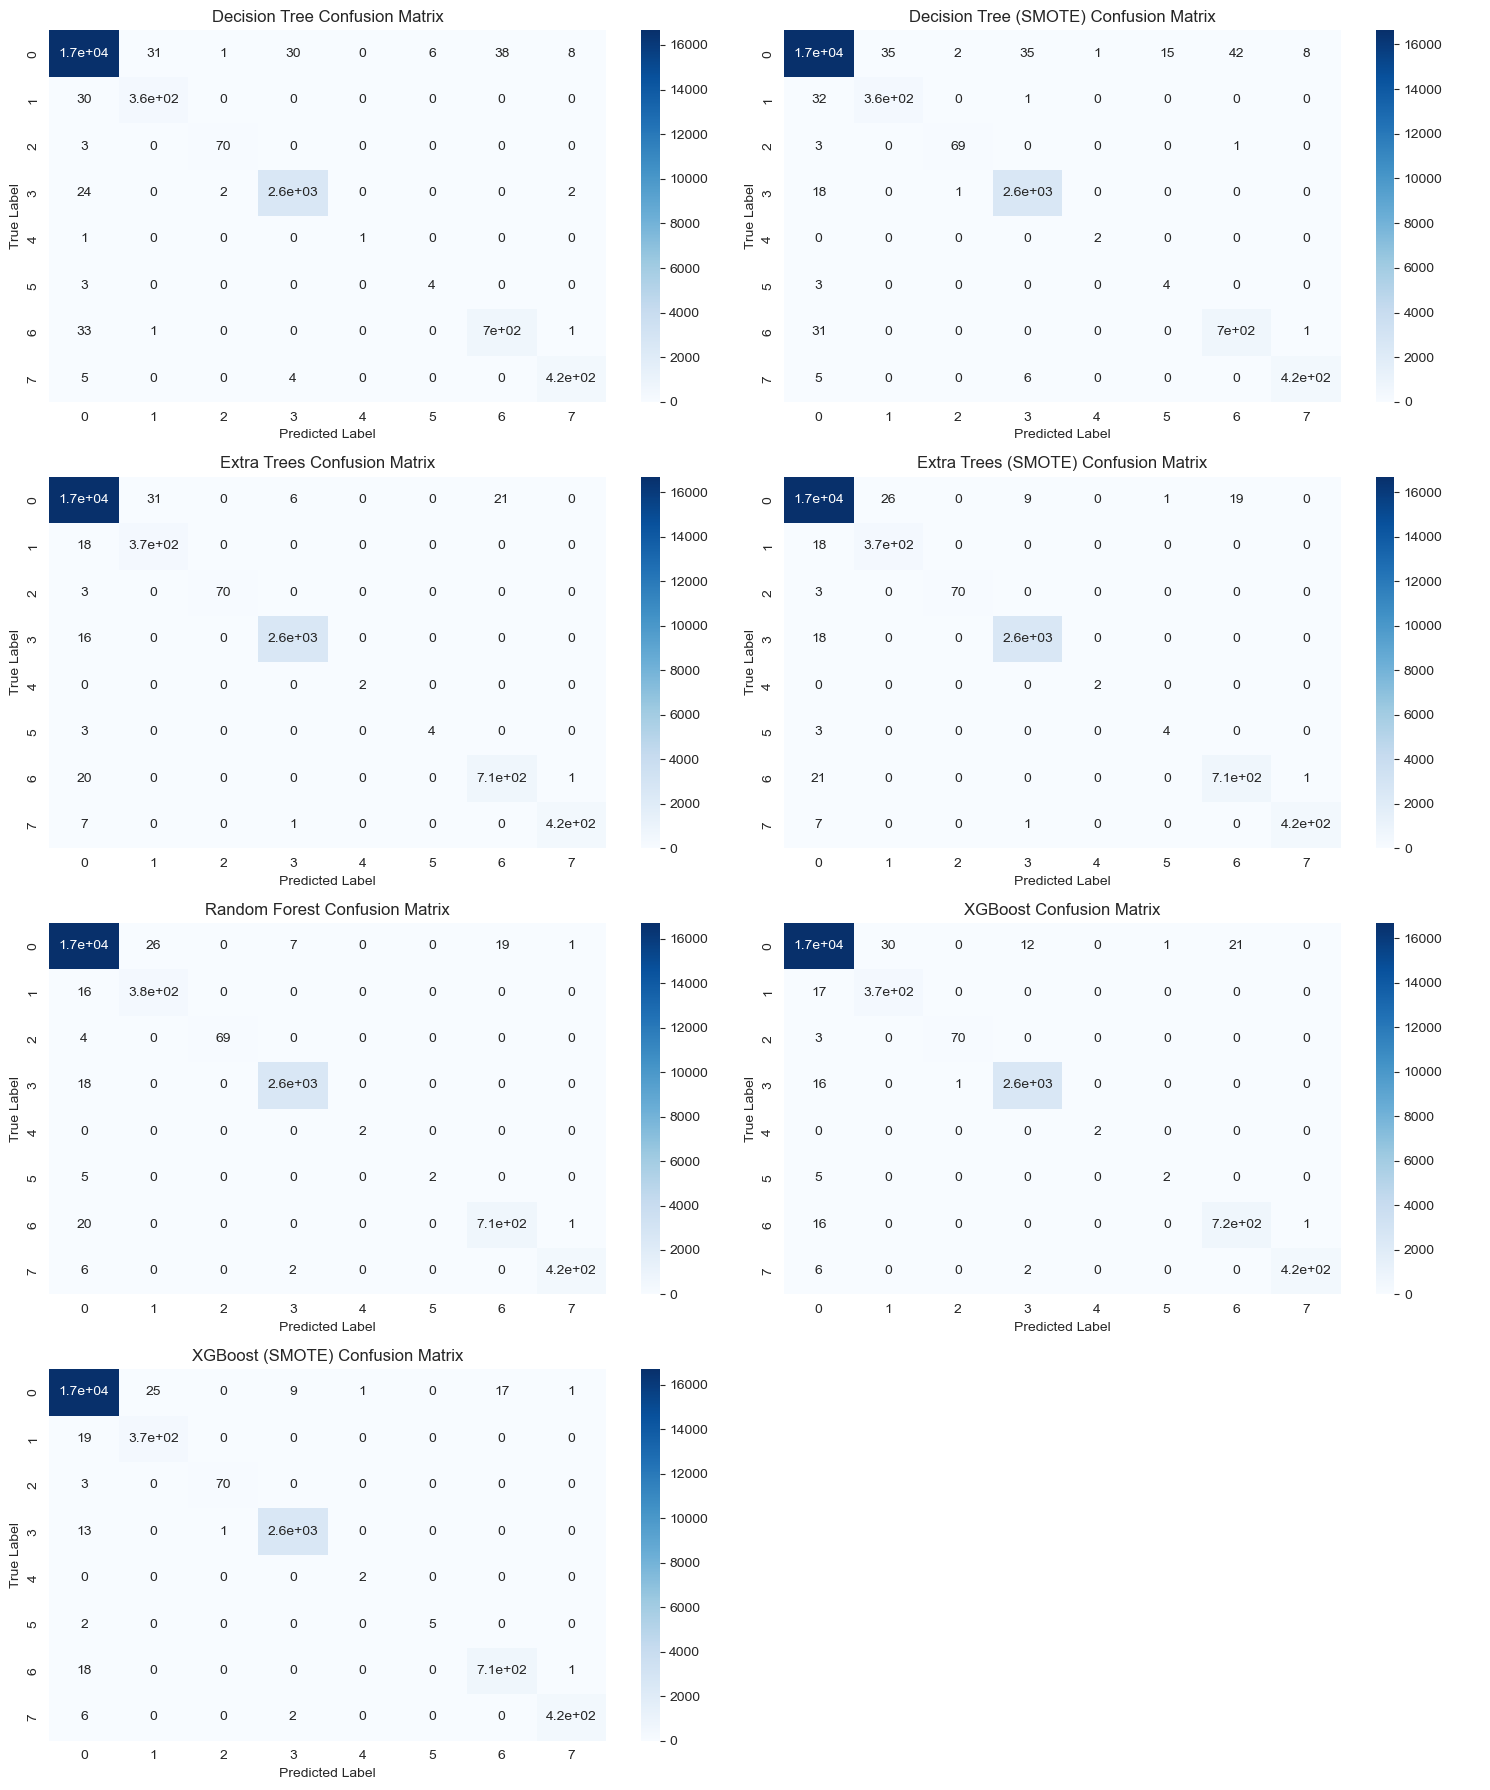

--- Decision Tree ---
Precision: 0.9895
Recall: 0.9894
F1-Score: 0.9894
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16762
           1       0.92      0.92      0.92       391
           2       0.96      0.96      0.96        73
           3       0.99      0.99      0.99      2579
           4       1.00      0.50      0.67         2
           5       0.40      0.57      0.47         7
           6       0.95      0.95      0.95       733
           7       0.97      0.98      0.98       429

    accuracy                           0.99     20976
   macro avg       0.90      0.86      0.87     20976
weighted avg       0.99      0.99      0.99     20976



--- Decision Tree (SMOTE) ---
Precision: 0.9891
Recall: 0.9886
F1-Score: 0.9888
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16762
           1       0.91      0.92      0.91       391
           2       0.96      0.9

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Models and their names
models = [  dt_hpo, dt_hpo_SMOTE, et_hpo, et_hpo_SMOTE, rf_hpo, xg_hpo, xg_hpo_SMOTE]
model_names = [
    "Decision Tree",
    "Decision Tree (SMOTE)",
    "Extra Trees",
    "Extra Trees (SMOTE)",
    "Random Forest",
    "XGBoost",
    "XGBoost (SMOTE)"
]

# Create a 4x2 subplot grid (enough for 7 models; leave one blank)
fig, axes = plt.subplots(4, 2, figsize=(15, 18))  # Adjust grid and figure size
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through models and plot confusion matrices
for i, (model, name) in enumerate(zip(models, model_names)):
    # Predict on the test set
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplot axes
for j in range(len(models), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Evaluate each model and print metrics
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_test, y_pred, average='weighted'
    )
    print(f"--- {name} ---")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {fscore:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")


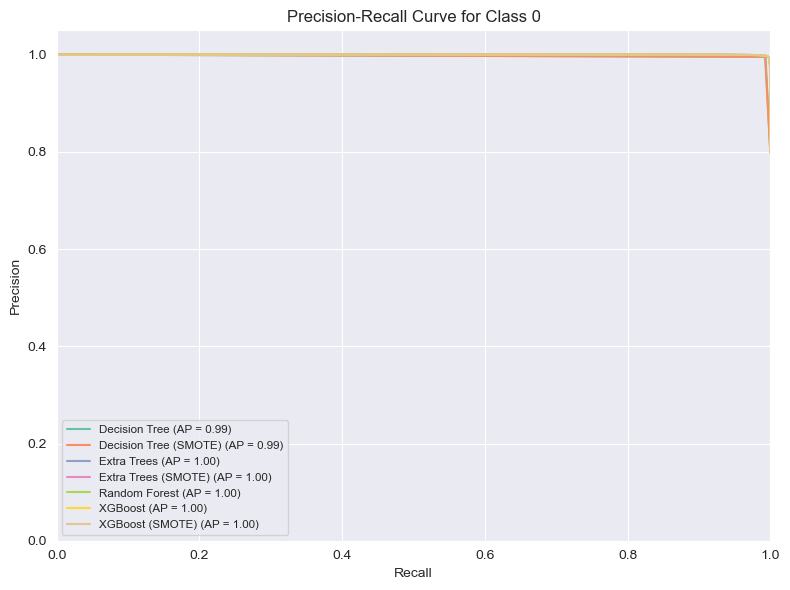

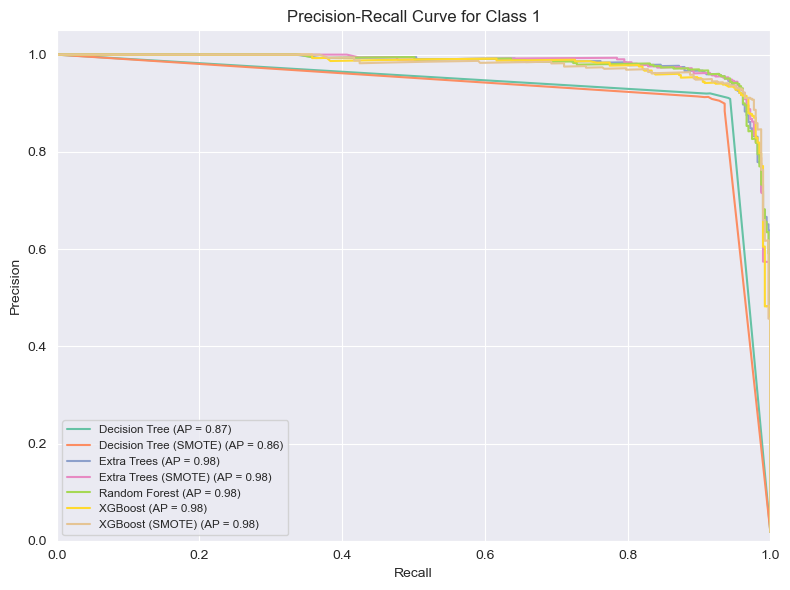

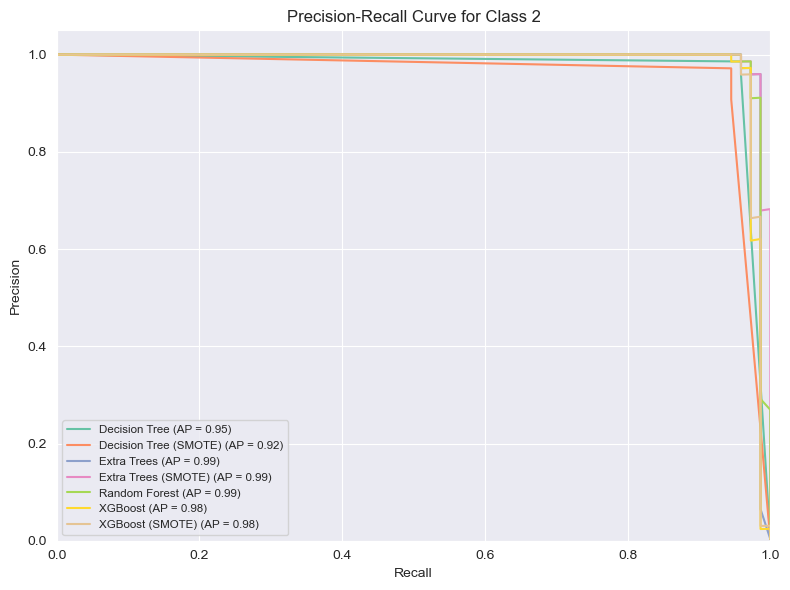

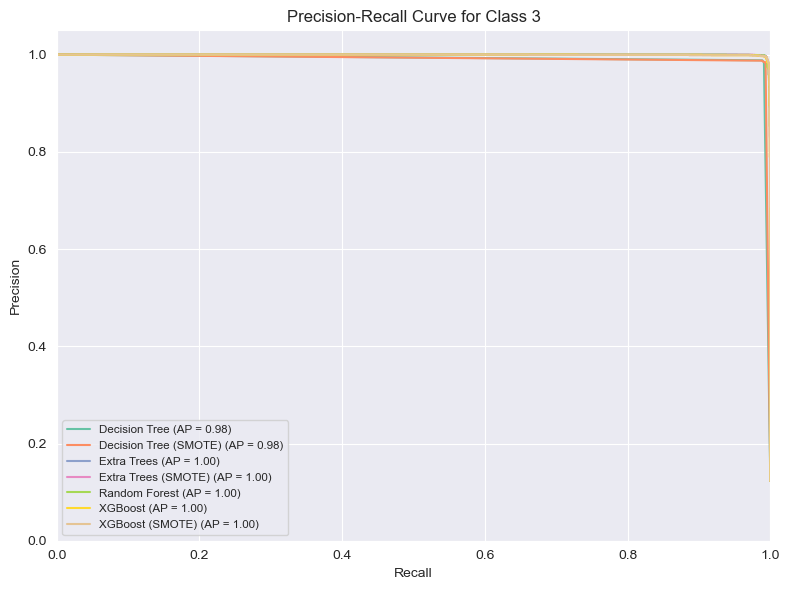

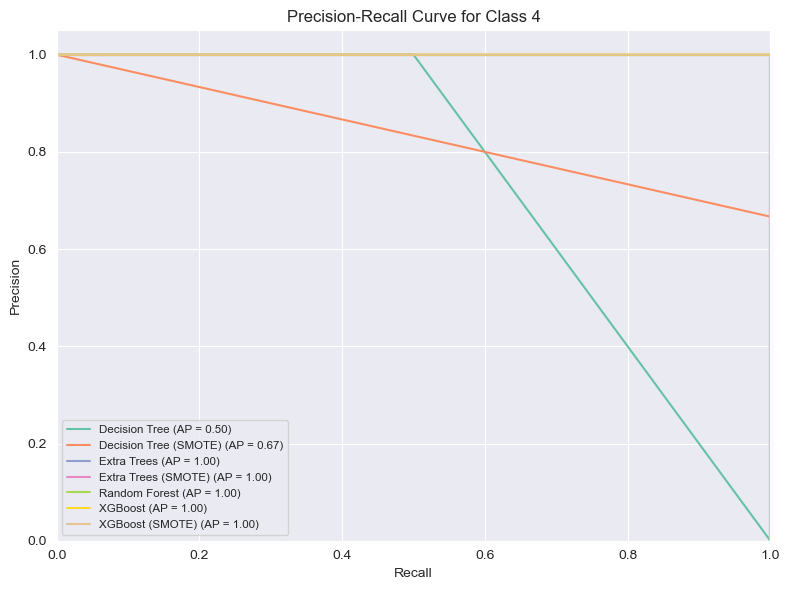

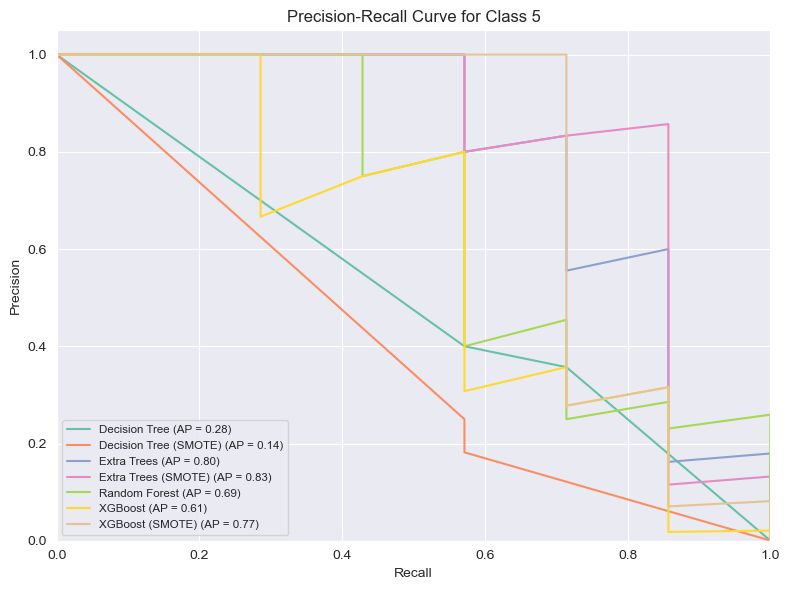

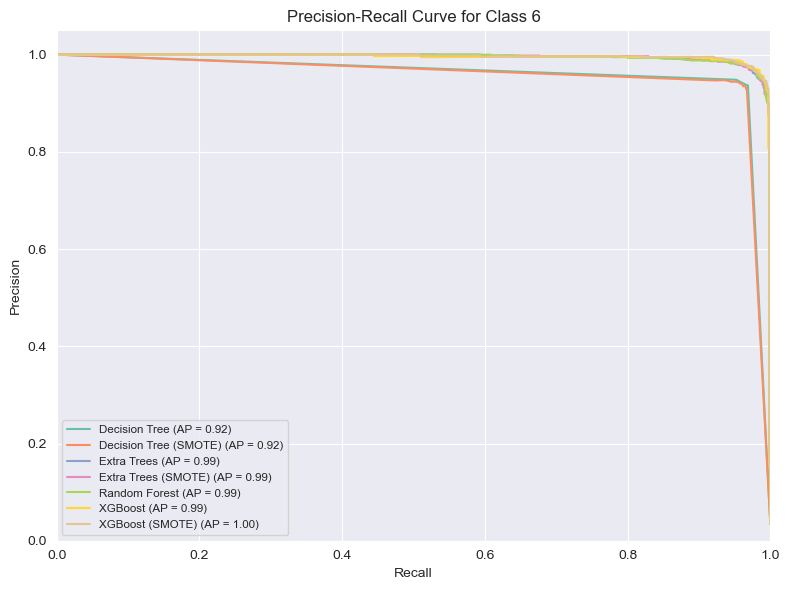

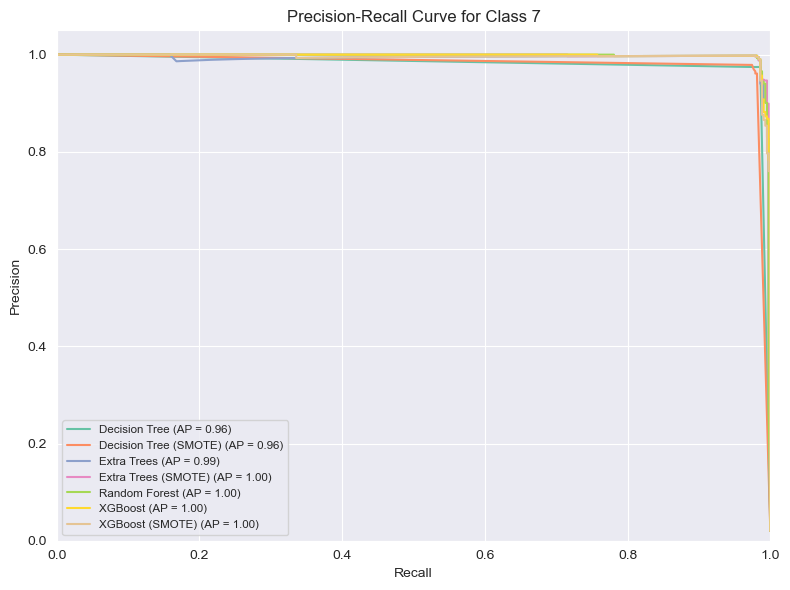

In [69]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_test`, `X_test`, and `models` are defined
classes = list(set(y_test))
n_classes = len(classes)

# Binarize the output for multiclass handling
y_test_bin = label_binarize(y_test, classes=classes)

# Colors for plotting
colors = sns.color_palette("Set2", n_colors=len(models))

# Loop through each class for separate plots
for class_idx, class_label in enumerate(classes):
    plt.figure(figsize=(8, 6))  # Create a separate figure for each class

    for model, name, color in zip(models, model_names, colors):
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            raise ValueError(f"The model {name} does not support `predict_proba`.")

        # Calculate PR curve for the current class
        precision, recall, _ = precision_recall_curve(y_test_bin[:, class_idx], y_score[:, class_idx])
        average_precision = average_precision_score(y_test_bin[:, class_idx], y_score[:, class_idx])

        # Plot the PR curve
        plt.plot(recall, precision, label=f'{name} (AP = {average_precision:.2f})', color=color)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Class {class_label}')
    plt.legend(loc='lower left', fontsize='small')
    plt.tight_layout()
    plt.show()


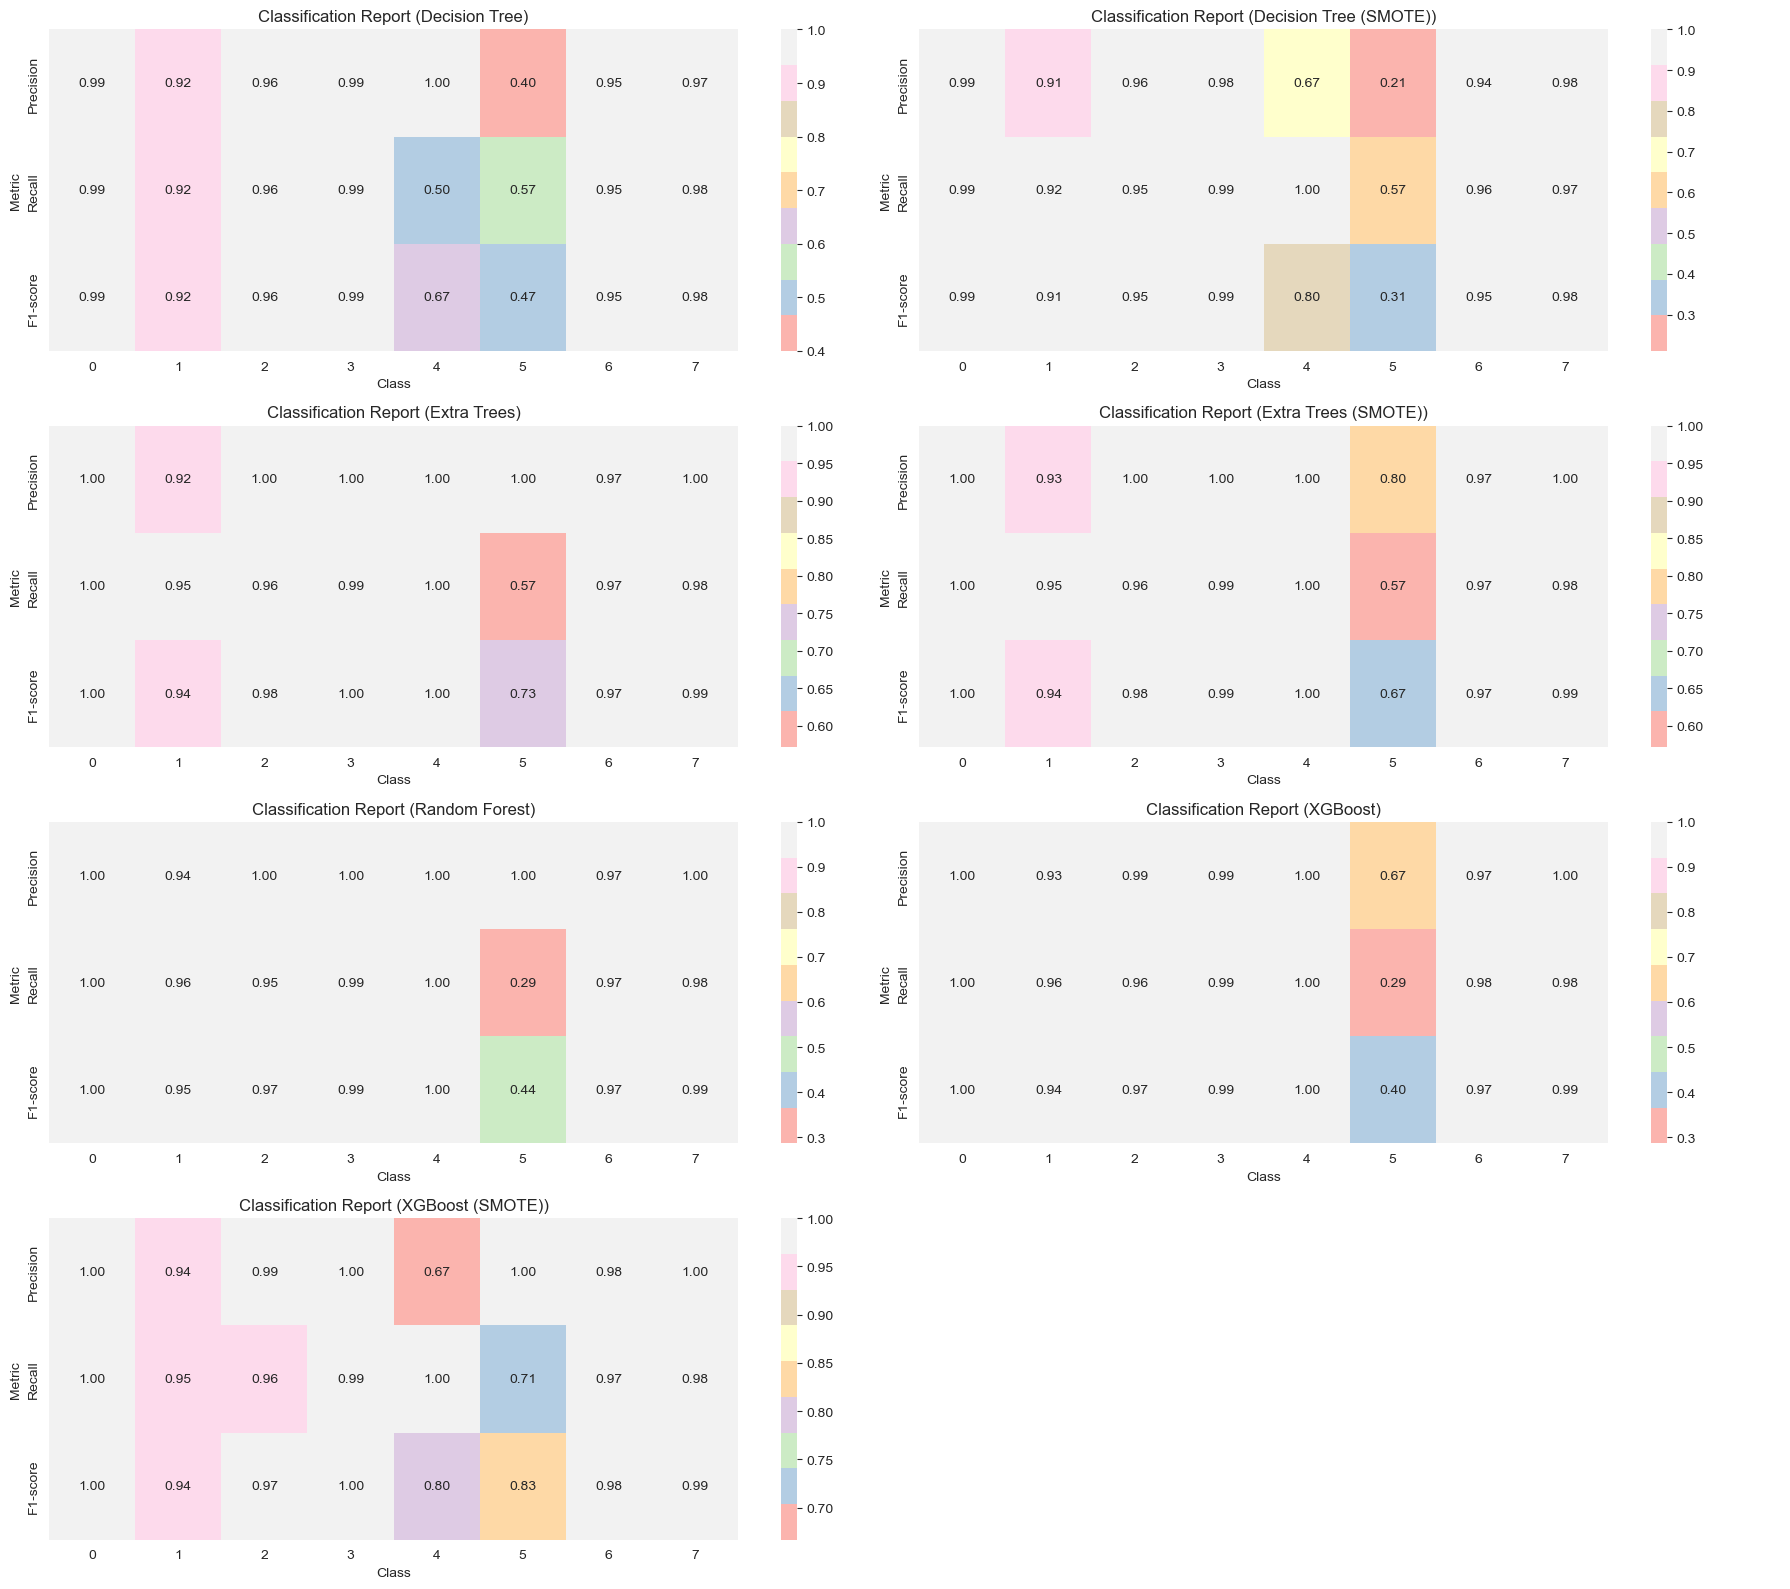

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Updated models and their names
models = [dt_hpo, dt_hpo_SMOTE, et_hpo, et_hpo_SMOTE, rf_hpo, xg_hpo, xg_hpo_SMOTE]
model_names = [
    "Decision Tree",
    "Decision Tree (SMOTE)",
    "Extra Trees",
    "Extra Trees (SMOTE)",
    "Random Forest",
    "XGBoost",
    "XGBoost (SMOTE)"
]

# Determine the layout based on the number of models (7 -> 4x2 layout with one empty)
fig, axes = plt.subplots(4, 2, figsize=(18, 16))  # Create a 4x2 subplot grid
axes = axes.flat  # Flatten the grid for easy iteration

for i, (model, name, ax) in enumerate(zip(models, model_names, axes)):
    y_pred = model.predict(X_test)  # Predict on the test set
    target_names = [str(cls) for cls in model.classes_]  # Get class labels as strings

    # Generate classification report as a dictionary
    metrics = classification_report(
        y_true=y_test,
        y_pred=y_pred,
        target_names=target_names,
        output_dict=True
    )

    # Extract precision, recall, and F1-score for each class
    precision = [metrics[target_name]['precision'] for target_name in target_names]
    recall = [metrics[target_name]['recall'] for target_name in target_names]
    f1_score = [metrics[target_name]['f1-score'] for target_name in target_names]

    # Combine metrics into a heatmap-compatible array
    data = np.array([precision, recall, f1_score])
    rows = ['Precision', 'Recall', 'F1-score']

    # Plot heatmap
    sns.heatmap(
        data,
        cmap='Pastel1',
        annot=True,
        fmt='.2f',
        xticklabels=target_names,
        yticklabels=rows,
        ax=ax
    )
    ax.set_title(f'Classification Report ({name})')
    ax.set_xlabel('Class')
    ax.set_ylabel('Metric')

# Hide any unused subplots (in case of uneven grid)
for ax in axes[len(models):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Apply Stacking

The ensemble model that combines the four ML models (DT, RF, ET, XGBoost)

In [71]:
# Generate train and test predictions for models without SMOTE
dt_train = dt_hpo.predict(X_train)
dt_test = dt_hpo.predict(X_test)

et_train = et_hpo.predict(X_train)
et_test = et_hpo.predict(X_test)

rf_train = rf_hpo.predict(X_train)
rf_test = rf_hpo.predict(X_test)

xg_train = xg_hpo.predict(X_train)
xg_test = xg_hpo.predict(X_test)

# Generate train and test predictions for models with SMOTE
dt_train_smote = dt_hpo_SMOTE.predict(X_train_SMOTE)
dt_test_smote = dt_hpo_SMOTE.predict(X_test)

et_train_smote = et_hpo_SMOTE.predict(X_train_SMOTE)
et_test_smote = et_hpo_SMOTE.predict(X_test)

xg_train_smote = xg_hpo_SMOTE.predict(X_train_SMOTE)
xg_test_smote = xg_hpo_SMOTE.predict(X_test)

# Create DataFrames for stacking
base_predictions_train_no_smote = pd.DataFrame({
    'DecisionTree': dt_train.ravel(),
    'ExtraTrees': et_train.ravel(),
    'RandomForest': rf_train.ravel(),
    'XgBoost': xg_train.ravel(),
})

base_predictions_train_smote = pd.DataFrame({
    'DecisionTree (SMOTE)': dt_train_smote.ravel(),
    'ExtraTrees (SMOTE)': et_train_smote.ravel(),
    'XgBoost (SMOTE)': xg_train_smote.ravel(),
})

# Display the first 5 rows of each DataFrame
print("Base Predictions without SMOTE:")
print(base_predictions_train_no_smote.head(5))

print("\nBase Predictions with SMOTE:")
print(base_predictions_train_smote.head(5))


Base Predictions without SMOTE:
   DecisionTree  ExtraTrees  RandomForest  XgBoost
0             0           0             0        0
1             0           0             0        0
2             3           3             3        3
3             0           0             0        0
4             0           0             0        0

Base Predictions with SMOTE:
   DecisionTree (SMOTE)  ExtraTrees (SMOTE)  XgBoost (SMOTE)
0                     0                   0                0
1                     0                   0                0
2                     3                   3                3
3                     0                   0                0
4                     0                   0                0


In [72]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [73]:
dt_train.shape

(83901, 1)

In [74]:
x_train_stack = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test_stack = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9936594202898551
Precision of Stacking: 0.9937128163138597
Recall of Stacking: 0.9936594202898551
F1-score of Stacking: 0.993632505929176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16762
           1       0.93      0.96      0.94       391
           2       0.99      0.96      0.97        73
           3       0.99      0.99      0.99      2579
           4       1.00      0.50      0.67         2
           5       1.00      0.43      0.60         7
           6       0.97      0.98      0.97       733
           7       1.00      0.98      0.99       429

    accuracy                           0.99     20976
   macro avg       0.98      0.85      0.89     20976
weighted avg       0.99      0.99      0.99     20976



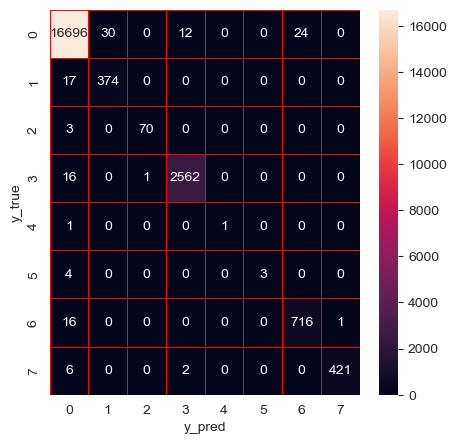

In [75]:
stk = xgb.XGBClassifier().fit(x_train_stack, y_train)
y_predict=stk.predict(x_test_stack)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [79]:
from sklearn.metrics import classification_report
import pandas as pd

# Define a function to calculate the F1 score for a model
def get_f1_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report['weighted avg']['f1-score']

# List of models to evaluate
models = {
    'DecisionTree': dt_hpo,
    'DecisionTree_SMOTE': dt_hpo_SMOTE,
    'ExtraTrees': et_hpo,
    'ExtraTrees_SMOTE': et_hpo_SMOTE,
    'RandomForest': rf_hpo,
    'XgBoost': xg_hpo,
    'XgBoost_SMOTE': xg_hpo_SMOTE
}

# Store F1 scores for each model
f1_scores = {}

# Evaluate each model on the test set
for model_name, model in models.items():
    f1 = get_f1_score(model, X_test, y_test)  # Get F1 score on the test set
    f1_scores[model_name] = f1

# Convert the F1 scores to a DataFrame for better visualization
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
f1_scores_df = f1_scores_df.sort_values(by='F1 Score', ascending=False)  # Sort by F1 score

# Display the best model based on F1 score
best_model_name = f1_scores_df.iloc[0]['Model']
best_model_f1 = f1_scores_df.iloc[0]['F1 Score']

print(f"Best Model: {best_model_name}")
print(f"F1 Score: {best_model_f1:.4f}")

# Display the best model's hyperparameters
if best_model_name == 'DecisionTree':
    print(f"Best Hyperparameters for {best_model_name}: {dt_hpo.get_params()}")
elif best_model_name == 'DecisionTree_SMOTE':
    print(f"Best Hyperparameters for {best_model_name}: {dt_hpo_SMOTE.get_params()}")
elif best_model_name == 'ExtraTrees':
    print(f"Best Hyperparameters for {best_model_name}: {et_hpo.get_params()}")
elif best_model_name == 'ExtraTrees_SMOTE':
    print(f"Best Hyperparameters for {best_model_name}: {et_hpo_SMOTE.get_params()}")
elif best_model_name == 'RandomForest':
    print(f"Best Hyperparameters for {best_model_name}: {rf_hpo.get_params()}")
elif best_model_name == 'XgBoost':
    print(f"Best Hyperparameters for {best_model_name}: {xg_hpo.get_params()}")
elif best_model_name == 'XgBoost_SMOTE':
    print(f"Best Hyperparameters for {best_model_name}: {xg_hpo_SMOTE.get_params()}")

# Display all models sorted by F1 score
print("\nAll models sorted by F1 score:")
print(f1_scores_df)


Best Model: XgBoost_SMOTE
F1 Score: 0.9944
Best Hyperparameters for XgBoost_SMOTE: {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 22, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 101, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'min_samples_split': 